# FRE-GY 7773 Machine Learning in Finance Final Project


## Topic: Neural Networks for Credit Risk Evaluation: investigation of different neural models and learning schemes (by Adnan Khashman)

### Xiaoyi Yang

### 1. Abstract

This notebook reimplements, investigates and improves the credit risk evaluation neural network method proposed by Adnan Khashman in his paper Neural Networks for Credit Risk Evaluation: investigation of different neural models and learning schemes. 

The credit risk evaluation system uses supervised neural network models based on the back propagation algorithm. Three neural network models are tested to generate a result of application scoring, a binary result of acceptance or rejection. Nine learning schemes with different training-to-validation data ratios have been considered. For this purpose, the data used are real German credit dataset, published on UCI Machine Learning data repository. The Comparasion of the implementation result generates the result of optimal parameters of this risk evaluation system. Besides the processure provide in this paper, which is rather simple, more criterias of model evaluation and improvement on the model is given in the notebook.

### 2. Problem Setting

From previous multiple academic works on neural networks models for credit evaluation, the author concluded several problems and limitation of the application of neural networks, and suggested respective solutions for these problems. In his paper, three main concerns are addressed.

The first one is to find a proper training-to-validation ratio. Other academic work may used a high traing-to-validation ratio which makes the quality of learning unmeaningful. An appropriate ratio should be closed to 50%:50% or lower. To find a solution for this problem, for each neural network model, 9 schemes of traing-to-validation ratio are tested to find a proper rate.

The second problem is normalization of the input data. For credit risk attribution, data are of different arrange and distribution. To make learning more efficient, it's important to normalize the data. The paper provides a simple way, diving each value by the largest. But this could lend to large information loss when the input arrange is large. So I change some alternative normalization method. 

The third promblem is the high computational cost of using neural networks. The more layers added to the model, the higher the computational cost is and longer processing time needed. To make the model as simplified, the author used one hidden layer and a single neuron at the output layer to minimize the computational cost and time.

To improve the model optimization procedure Khashman provided, which is designed relatively simple, several hyperparameter tunings are implemented to find better hyperparameters.

### 3. Data Processing 

In [1]:
# library needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 3.1 Data Importing and Interpretation

In [2]:
credit_data = pd.read_csv('Data/german.data-numeric.csv')
credit_char = pd.read_csv('Data/german.data-character.csv',header=None)
credit_char.columns = ['Attribute '+str(i) for i in range(1,21)]+['Target']

The German Credit Dataset includes 1000 cases of loan applications. The original data, german.data-character file, has a mix of 20 categorical and neumeral attributions, recording several financial and demographical information of applicants. The dataset is then tranferred into numerical version increasing the input attributions to 24. The result is shown as 1 (good, 700 instnaces) or 2 (bad, 300 instances). The numeric version of dataset is used for learning purpose.

Data resources: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [3]:
credit_char.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
credit_data.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Attribute 21,Attribute 22,Attribute 23,Attribute 24,Target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [5]:
credit_data.shape # 1000 cases with 24 input attribution and 1 returned result

(1000, 25)

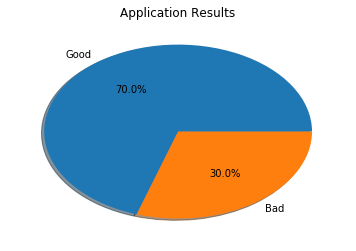

In [6]:
plt.pie([np.sum(credit_data['Target'] == 1),np.sum(credit_data['Target'] == 2)], labels=['Good','Bad'], shadow=True,autopct='%1.1f%%')
plt.title('Application Results')
plt.show()

The dataset records the loan applicants' existing money and asset information, basic demographic information, credit history, employment situation, etc. To better understand the applicant pool, we can see the following graphs for dataset interpretation.

Taking a closer look at the original characteristic dataset, we can have some interpretation on how on individual variable would influence on applicant decision.

#### Sex and Personal Status

In [7]:
credit_char.groupby(['Attribute 9','Target'])['Target'].count()

Attribute 9  Target
A91          1          30
             2          20
A92          1         201
             2         109
A93          1         402
             2         146
A94          1          67
             2          25
Name: Target, dtype: int64

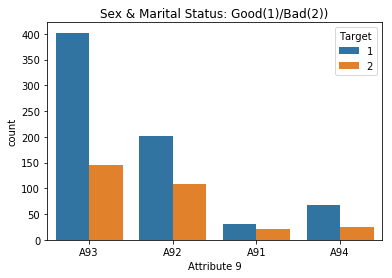

(Attribute 9) A93: male single,A92:female divorced/separated/married,A91: male divorced/separated, A94: male married/widowed


In [8]:
sns.countplot('Attribute 9',hue='Target',data=credit_char)
plt.title('Sex & Marital Status: Good(1)/Bad(2))')
plt.show()
print('(Attribute 9) A93: male single,A92:female divorced/separated/married,A91: male divorced/separated, A94: male married/widowed')

From the bar graph above, we can see that male makes up more of the applicant pool and they have higher probability of being accepted, especially single male. To find more convicing conclusion, we expand the investigation on employment status.

#### Employment Status - continuous
(Attribute 7) A71:umeployed,A72:0-1 yr, A73: 1-4 yr, A74: 4-7 yr, A75: >7 yr

In [9]:
pd.crosstab([credit_char['Attribute 7'], credit_char['Target']],credit_char['Attribute 9'],margins=True).style.background_gradient(cmap='summer_r')

From the above graph, we can see that single male still shows advantage (darker shade) on risk rating. For employment year, employers with more than 7 year experience are the preferred applicants (189/64).

#### Credit Amount - continuous

##### Another factor that could be combining looked at is the credit history (Attribute 5).
Qualitative: credit amount

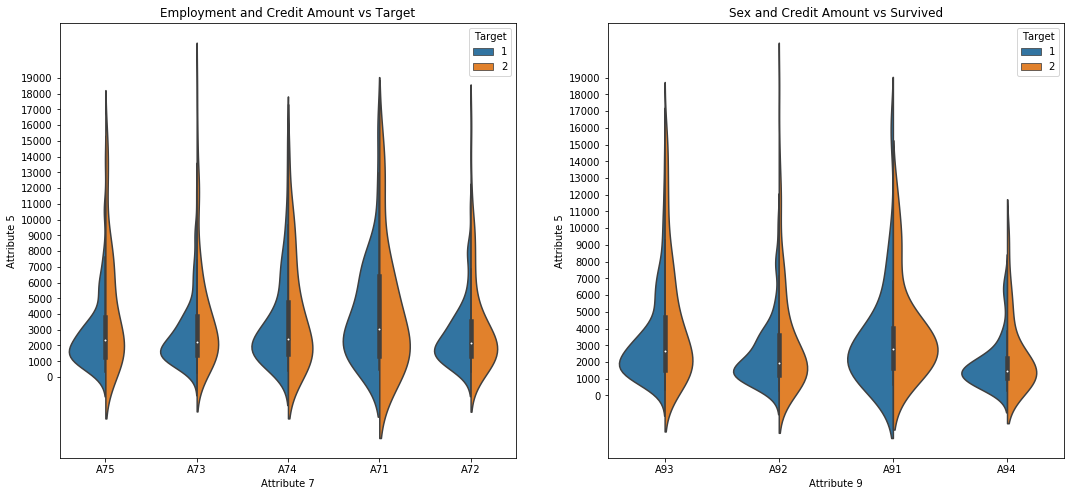

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Attribute 7","Attribute 5", hue="Target", data=credit_char,split=True,ax=ax[0])
ax[0].set_title('Employment and Credit Amount vs Target')
ax[0].set_yticks(range(0,20000,1000))
sns.violinplot("Attribute 9","Attribute 5", hue="Target", data=credit_char,split=True,ax=ax[1])
ax[1].set_title('Sex and Credit Amount vs Survived')
ax[1].set_yticks(range(0,20000,1000))
plt.show()

/Users/xiaoyiyang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


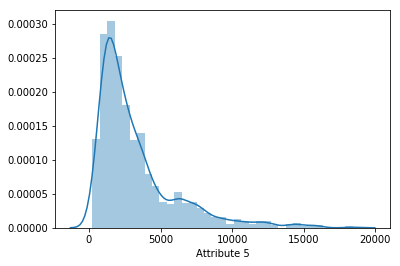

In [11]:
sns.distplot(credit_char['Attribute 5'])

Comparing the distribution of credit amount and joint graphs with the above two avariables, we can see that if the credit amount is at the right tail, the high credit amount will make the applicants as Bad applicants. Most applicants have credit amount around 2000, and credit amount does not influence the ranking of preference of the other two variables. We can say that the variable credit amount has great tail influence on credit risk evaluation. 

For more precise credit risk prediction, a complete analysis of all attributes should be implemented. We now start to consider the neural network model we mainly want to analyze in this notebook. The first important step is data cleaning and normalization.

#### 3.2 Data Cleaning and Normalization

In [12]:
credit_data['Target']=credit_data['Target'] - 1 #recode the target result from 1 and 2 to 0 and 1.

In the paper, the author proposed to normalize the input data by dividing the largest number of a certain input, since the input numbers are all positive.

In [13]:
max_input_value = [credit_data[i].max() for i in credit_data.columns]
max_input_value # The largest number for each attribution

[4, 72, 4, 184, 5, 5, 4, 4, 4, 75, 3, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [14]:
credit_norm1 = credit_data/credit_data.max() # normalize the attribution by diving the largest number

In [15]:
credit_norm1.head()


,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Attribute 21,Attribute 22,Attribute 23,Attribute 24,Target
0,0.25,0.083333,1.00,0.065217,1.0,1.0,0.75,1.00,0.25,0.893333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.50,0.666667,0.50,0.326087,0.2,0.6,0.50,0.50,0.25,0.293333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.00,0.166667,1.00,0.114130,0.2,0.8,0.75,0.75,0.25,0.653333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.25,0.583333,0.50,0.429348,0.2,0.8,0.75,1.00,0.50,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.25,0.333333,0.75,0.266304,0.2,0.6,0.75,1.00,1.00,0.706667,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


/Users/xiaoyiyang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/xiaoyiyang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


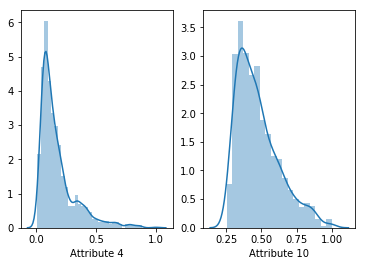

In [16]:
plt.subplot(121)
sns.distplot(credit_norm1['Attribute 4'])
plt.subplot(122)
sns.distplot(credit_norm1['Attribute 10'])

However, from the above distribution of the two attributes of normalized input, we can see that the inputs are skewed and range is tight. And because the largest value of attribution 2, 4, 10 can be huge. Directly dividing them out can lead to big information loss and make the normalized input really skewed. So I tried Z-score Normalization method below to minimize the influence on various variances and make the attributions be zero-centered. 

In [16]:
credit_norm2 = (credit_data - credit_data.mean())/credit_data.std()
credit_norm2['Target'] = credit_data['Target']

In [17]:
credit_norm2.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Attribute 21,Attribute 22,Attribute 23,Attribute 24,Target
0,-1.253938,-1.235859,1.343342,-0.733065,1.832252,1.337409,0.449102,1.046463,-1.293076,2.765073,...,-0.552429,-0.338692,0.320052,-0.206664,-0.4667,0.634131,-0.149908,-0.49975,0.765973,0
1,-0.458797,2.247070,-0.503176,0.965893,-0.699357,-0.317800,-0.963168,-0.765594,-1.293076,-1.190808,...,-0.552429,-0.338692,0.320052,-0.206664,-0.4667,0.634131,-0.149908,-0.49975,0.765973,1
2,1.131486,-0.738298,1.343342,-0.414510,-0.699357,0.509805,0.449102,0.140434,-1.293076,1.182721,...,-0.552429,-0.338692,0.320052,-0.206664,-0.4667,0.634131,-0.149908,1.99900,-1.304224,0
3,-1.253938,1.749509,-0.503176,1.638398,-0.699357,0.509805,0.449102,1.046463,-0.340885,0.831087,...,-0.552429,-0.338692,-3.121368,-0.206664,-0.4667,-1.575384,-0.149908,-0.49975,0.765973,0
4,-1.253938,0.256825,0.420083,0.576549,-0.699357,-0.317800,0.449102,1.046463,1.563498,1.534354,...,1.808378,-0.338692,0.320052,-0.206664,-0.4667,-1.575384,-0.149908,-0.49975,0.765973,1


Using the Z-score normalization method, we can observe that the attributions are more zero-centered and with a larger but more comparable ranges.

### 4. Model Set Up and Hyperparameter Tuning

In Khashman's paper, three neural network models with different hidden layer neurons are each tested by nine learning schemes, which has different training-to-validation ratios. Besides Khashman's way to find the optimal parameters, more tuning should be conducted to make the result convicing. Therefore, the hyperparameter tuning on hidden layer number, learning rate and activation function are also included besides the original method.

#### 4.1 Random Sampling for Different Schemes

To testify the performance of two normalization methods, results for both methods are kept to do the tuning. 9 schemes are training-to-validation ratio of 1:9, 2:8 ... to 9:1.

In [18]:
# Randomly select normalized data by the first method
for i in range(1,10):
    sample = credit_norm1.sample(1000-100*i)
    globals()['lrn_sch1_train_%s' % i] = sample
    globals()['lrn_sch1_test_%s' % i] = credit_norm1.loc[~credit_norm1.index.isin(sample.index),:]   
    
#lrn_sch1_train_1 & lrn_sch1_test_1 are the corresponding training and testing dataset

In [19]:
# Randomly select normalized data by the z-score method
for i in range(1,10):
    sample = credit_norm2.sample(1000-100*i)
    globals()['lrn_sch2_train_%s' % i] = sample
    globals()['lrn_sch2_test_%s' % i] = credit_norm2.loc[~credit_norm2.index.isin(sample.index),:]

#lrn_sch2_train_1 & lrn_sch2_test_1 are the corresponding training and testing dataset    

#### 4.2 Model Setting up and Model Tuning 

To find the most optimal hyperparameter of neural model for credit risk evaluation, Khashman suggested to test on hidden layer neuron numbers and train-to-evaluation ratios. In Khasman's model, only one hidden layer is used to save computation time. For the hidden layer, three neuron numbers are set as 18, 23 and 27. In this notebook, they are annotated as ANN_1, ANN_2 and ANN_3. The corresponding learning rates are 0.0081, 0.0095 and 0.0075, and the corresponding momentum rates are 0.7, 0.69 and 0.79. The maximum allowed iteration is set as 25,000. So we create initial instances of neural network models with these parameters and set others as default.

More tuning are added based on hidden layer number, learning rate, activation function. The hidden layer number is increased to 2 and 3. Learning rate are lowered to half of the orinal setting. The models are also tested on 'logistic' and 'tanh' activation funcstions.

In [20]:
# library needed
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score as acs
import time

In [21]:
# The original models Khashman suggested 
ANN_11 = MLPClassifier(hidden_layer_sizes=(18,), activation='relu', learning_rate='constant', learning_rate_init=0.0081,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.7, early_stopping=False)
ANN_12 = MLPClassifier(hidden_layer_sizes=(23,), activation='relu', learning_rate='constant', learning_rate_init=0.0095,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.69, early_stopping=False)
ANN_13 = MLPClassifier(hidden_layer_sizes=(27,), activation='relu', learning_rate='constant', learning_rate_init=0.0075,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.79, early_stopping=False)

In [22]:
# Neural Models with different activation functions, logistic and tanh
ANN_21 = MLPClassifier(hidden_layer_sizes=(18,), activation='logistic', learning_rate='constant', learning_rate_init=0.0081,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.7, early_stopping=False)
ANN_22 = MLPClassifier(hidden_layer_sizes=(23,), activation='logistic', learning_rate='constant', learning_rate_init=0.0095,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.69, early_stopping=False)
ANN_23 = MLPClassifier(hidden_layer_sizes=(27,), activation='logistic', learning_rate='constant', learning_rate_init=0.0075,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.79, early_stopping=False)
ANN_24 = MLPClassifier(hidden_layer_sizes=(18,), activation='tanh', learning_rate='constant', learning_rate_init=0.0081,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.7, early_stopping=False)
ANN_25 = MLPClassifier(hidden_layer_sizes=(23,), activation='tanh', learning_rate='constant', learning_rate_init=0.0095,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.69, early_stopping=False)
ANN_26 = MLPClassifier(hidden_layer_sizes=(27,), activation='tanh', learning_rate='constant', learning_rate_init=0.0075,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.79, early_stopping=False)

In [23]:
# Neural Models with more hidden layers, 2 and 3
ANN_31 = MLPClassifier(hidden_layer_sizes=(18,18), activation='relu', learning_rate='constant', learning_rate_init=0.0081,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.7, early_stopping=False)
ANN_32 = MLPClassifier(hidden_layer_sizes=(23,23), activation='relu', learning_rate='constant', learning_rate_init=0.0095,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.69, early_stopping=False)
ANN_33 = MLPClassifier(hidden_layer_sizes=(27,27), activation='relu', learning_rate='constant', learning_rate_init=0.0075,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.79, early_stopping=False)
ANN_34 = MLPClassifier(hidden_layer_sizes=(18,18,18), activation='relu', learning_rate='constant', learning_rate_init=0.0081,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.7, early_stopping=False)
ANN_35 = MLPClassifier(hidden_layer_sizes=(23,23,23), activation='relu', learning_rate='constant', learning_rate_init=0.0095,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.69, early_stopping=False)
ANN_36 = MLPClassifier(hidden_layer_sizes=(27,27,27), activation='relu', learning_rate='constant', learning_rate_init=0.0075,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.79, early_stopping=False)

In [24]:
# Neural Models with lower learning rates, half of the original model
ANN_41 = MLPClassifier(hidden_layer_sizes=(18,), activation='relu', learning_rate='constant', learning_rate_init=0.0081/2,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.7, early_stopping=False)
ANN_42 = MLPClassifier(hidden_layer_sizes=(23,), activation='relu', learning_rate='constant', learning_rate_init=0.0095/2,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.69, early_stopping=False)
ANN_43 = MLPClassifier(hidden_layer_sizes=(27,), activation='relu', learning_rate='constant', learning_rate_init=0.0075/2,
                      max_iter=25000, random_state=None, tol=0.0001, verbose=False, momentum=0.79, early_stopping=False)

#### 4.3 Performance Evaluation Setting

To finally compare the performance of these tuned models, a table to record related evaluation criterion are shown as below:

In [25]:
# replicating the evaluation of original paper
perf_table_1 = pd.DataFrame({'Learning Scheme':[],'Learning Ratio':[],'Neural Network':[],'Normalization':[],
                            'Obtained Error':[],'Training Time':[],'Testing Time':[],'Training Accuracy Rate':[],
                            'Validation Accuracy Rate':[], 'Overall Accuracy Rate':[] })
# evaluation table for different activation function
perf_table_2 = pd.DataFrame({'Learning Scheme': [],'Learning Ratio':[],'Neural Network':[],'Activation Func':[],
                            'Obtained Error':[],'Training Time':[],'Testing Time':[],'Training Accuracy Rate':[],
                            'Validation Accuracy Rate':[], 'Overall Accuracy Rate':[] })
# evaluation table for more hidden layers
perf_table_3 = pd.DataFrame({'Learning Scheme': [],'Learning Ratio':[],'Neural Network':[],'Hidden Layer Number':[],
                            'Obtained Error':[],'Training Time':[],'Testing Time':[],'Training Accuracy Rate':[],
                            'Validation Accuracy Rate':[], 'Overall Accuracy Rate':[] })
#evaluation table for lower learning rate
perf_table_4 = pd.DataFrame({'Learning Scheme': [],'Learning Ratio':[],'Neural Network':[],'Learning Rate':[],
                            'Obtained Error':[],'Training Time':[],'Testing Time':[],'Training Accuracy Rate':[],
                            'Validation Accuracy Rate':[], 'Overall Accuracy Rate':[]} )

### 5. Model Running and Result Generation

We have generate 27 scenario (3 neural model with 9 learning schemes) in total. In the following process, the work are about model fitting, prediction and performance recording.

In [26]:
# Training-to-Validation ratio 9:1, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_1['Target'])
train_time = time.time() - train_time # The training time
obtained_error = ANN_11.loss_ # obtained error
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_1[['Attribute '+str(i) for i in range(1,25)]]) # predict the testing set
fit_time = time.time()-fit_time # test time
# accuracy analysis
accuracy_train = acs(lrn_sch1_train_1['Target'],ANN_11.predict(lrn_sch1_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
#performance recording
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_11.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_21.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_24.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_31.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_34.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_41.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

In [27]:
# Training-to-Validation ratio 9:1, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_1['Target'],ANN_12.predict(lrn_sch1_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_12.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_22.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_25.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_32.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_35.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_42.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 9:1, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_1['Target'],ANN_13.predict(lrn_sch1_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_13.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_23.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_26.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_33.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_36.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_1['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_1[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_1['Target'],ANN_43.predict(lrn_sch2_train_1[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_1['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['900:100'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 8:2, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_2['Target'],ANN_12.predict(lrn_sch1_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_11.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_21.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_24.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_31.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_34.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_41.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 8:2, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_2['Target'],ANN_12.predict(lrn_sch1_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_12.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['800:200'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_22.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 1'],'Learning Ratio':['800:200'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_25.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_32.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_35.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_42.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 8:2, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_2['Target'],ANN_13.predict(lrn_sch1_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_13.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_23.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_26.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_33.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_36.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_2['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_2[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_2['Target'],ANN_43.predict(lrn_sch2_train_2[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_2['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 2'],'Learning Ratio':['800:200'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

In [32]:
# Training-to-Validation ratio 7:3, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_3['Target'],ANN_11.predict(lrn_sch1_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_11.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_21.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_24.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_31.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_34.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_41.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 7:3, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_3['Target'],ANN_12.predict(lrn_sch1_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_12.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_22.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_25.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_32.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_35.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_42.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 7:3, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_3['Target'],ANN_13.predict(lrn_sch1_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_13.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_23.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_26.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_33.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_36.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_3['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_3[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_3['Target'],ANN_43.predict(lrn_sch2_train_3[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_3['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 3'],'Learning Ratio':['700:300'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

In [33]:
# Training-to-Validation ratio 6:4, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_4['Target'],ANN_11.predict(lrn_sch1_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_11.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_21.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_24.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_31.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_34.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_41.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 6:4, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_4['Target'],ANN_12.predict(lrn_sch1_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_12.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_22.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_25.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_32.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_35.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_42.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 6:4, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_4['Target'],ANN_13.predict(lrn_sch1_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_13.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_23.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_26.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_33.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_36.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_4['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_4[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_4['Target'],ANN_43.predict(lrn_sch2_train_4[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_4['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 4'],'Learning Ratio':['600:400'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

In [34]:
# Training-to-Validation ratio 5:5, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_5['Target'],ANN_11.predict(lrn_sch1_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_11.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_21.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_24.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_31.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_34.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_41.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 5:5, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_5['Target'],ANN_12.predict(lrn_sch1_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_12.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_22.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_25.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_32.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_35.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_42.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 5:5, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_5['Target'],ANN_13.predict(lrn_sch1_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_13.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_23.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_26.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_33.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_36.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_5['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_5[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_5['Target'],ANN_43.predict(lrn_sch2_train_5[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_5['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 5'],'Learning Ratio':['500:500'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 4:6, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_6['Target'],ANN_11.predict(lrn_sch1_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_11.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_21.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_24.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_31.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_34.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_41.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 4:6, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_6['Target'],ANN_12.predict(lrn_sch1_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_12.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_22.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_25.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_32.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_35.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_42.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 4:6, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_6['Target'],ANN_13.predict(lrn_sch1_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_13.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_23.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_26.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_33.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_36.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_6['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_6[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_6['Target'],ANN_43.predict(lrn_sch2_train_6[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_6['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 6'],'Learning Ratio':['400:600'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 3:7, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_7['Target'],ANN_11.predict(lrn_sch1_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_11.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_21.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_24.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_31.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_34.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_41.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 3:7, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_7['Target'],ANN_12.predict(lrn_sch1_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_12.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_22.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_25.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_32.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_35.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_42.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 3:7, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_7['Target'],ANN_13.predict(lrn_sch1_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_13.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_23.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_26.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_33.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_36.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_7['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_7[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_7['Target'],ANN_43.predict(lrn_sch2_train_7[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_7['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 7'],'Learning Ratio':['300:700'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

In [37]:
# Training-to-Validation ratio 2:8, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_8['Target'],ANN_11.predict(lrn_sch1_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_11.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_21.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_24.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_31.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_34.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_41.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 2:8, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_8['Target'],ANN_12.predict(lrn_sch1_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_12.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_22.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_25.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_32.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_35.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_42.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 2:8, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_8['Target'],ANN_13.predict(lrn_sch1_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_13.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_23.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_26.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_33.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_36.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_8['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_8[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_8['Target'],ANN_43.predict(lrn_sch2_train_8[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_8['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 8'],'Learning Ratio':['200:800'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)



In [ ]:
# Training-to-Validation ratio 1:9, ANN-1
# fitting recorded in the first performance table
train_time = time.time()
ANN_11.fit(lrn_sch1_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch1_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_9['Target'],ANN_11.predict(lrn_sch1_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_11.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_1'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_11.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_11.loss_
fit_time = time.time()
prediction_result = ANN_11.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_11.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_11.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_1'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_21.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_21.loss_
fit_time = time.time()
prediction_result = ANN_21.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_21.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_21.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_1'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_24.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_24.loss_
fit_time = time.time()
prediction_result = ANN_24.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_24.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_24.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_1'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_31.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_31.loss_
fit_time = time.time()
prediction_result = ANN_31.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_31.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_31.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_1'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_34.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_34.loss_
fit_time = time.time()
prediction_result = ANN_34.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_34.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_34.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_1'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_41.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_41.loss_
fit_time = time.time()
prediction_result = ANN_41.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_41.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_41.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_1'],'Learning Rate':[0.00405],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 1:9, ANN-2
# fitting recorded in the first performance table
train_time = time.time()
ANN_12.fit(lrn_sch1_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch1_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_9['Target'],ANN_12.predict(lrn_sch1_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_12.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_2'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_12.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_12.loss_
fit_time = time.time()
prediction_result = ANN_12.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_12.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_12.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_2'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_22.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_22.loss_
fit_time = time.time()
prediction_result = ANN_22.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_22.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_22.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_2'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_25.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_25.loss_
fit_time = time.time()
prediction_result = ANN_25.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_25.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_25.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_2'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_32.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_32.loss_
fit_time = time.time()
prediction_result = ANN_32.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_32.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_32.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_2'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_35.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_35.loss_
fit_time = time.time()
prediction_result = ANN_35.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_35.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_35.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_2'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_42.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_42.loss_
fit_time = time.time()
prediction_result = ANN_42.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_42.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_42.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_2'],'Learning Rate':[0.00475],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)

# Training-to-Validation ratio 1:9, ANN-3
# fitting recorded in the first performance table
train_time = time.time()
ANN_13.fit(lrn_sch1_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch1_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch1_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch1_train_9['Target'],ANN_13.predict(lrn_sch1_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch1_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm1['Target'],ANN_13.predict(credit_norm1[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_3'],'Normalization':['Original'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

train_time = time.time()
ANN_13.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_13.loss_
fit_time = time.time()
prediction_result = ANN_13.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_13.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_13.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_3'],'Normalization':['Z-score'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_1 = perf_table_1.append(perf_summ)

#fitting recorded in the second performance table
train_time = time.time()
ANN_23.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_23.loss_
fit_time = time.time()
prediction_result = ANN_23.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_23.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_23.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_3'],'Activation Func':['Logistic'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

train_time = time.time()
ANN_26.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_26.loss_
fit_time = time.time()
prediction_result = ANN_26.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_26.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_26.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_3'],'Activation Func':['Tanh'],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_2 = perf_table_2.append(perf_summ)

#fitting recorded in the third performance table
train_time = time.time()
ANN_33.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_33.loss_
fit_time = time.time()
prediction_result = ANN_33.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_33.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_33.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_3'],'Hidden Layer Number':[2],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

train_time = time.time()
ANN_36.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_36.loss_
fit_time = time.time()
prediction_result = ANN_36.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_36.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_36.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_3'],'Hidden Layer Number':[3],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_3 = perf_table_3.append(perf_summ)

#fitting recorded in the fourth performance table
train_time = time.time()
ANN_43.fit(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]],lrn_sch2_train_9['Target'])
train_time = time.time() - train_time
obtained_error = ANN_43.loss_
fit_time = time.time()
prediction_result = ANN_43.predict(lrn_sch2_test_9[['Attribute '+str(i) for i in range(1,25)]])
fit_time = time.time()-fit_time
accuracy_train = acs(lrn_sch2_train_9['Target'],ANN_43.predict(lrn_sch2_train_9[['Attribute '+str(i) for i in range(1,25)]]))
accuracy_test = acs(lrn_sch2_test_9['Target'],prediction_result)
accuracy_overall = acs(credit_norm2['Target'],ANN_43.predict(credit_norm2[['Attribute '+str(i) for i in range(1,25)]]))
perf_summ = pd.DataFrame({'Learning Scheme':['LS 9'],'Learning Ratio':['100:900'],'Neural Network':['ANN_3'],'Learning Rate':[0.00375],
                            'Obtained Error':[obtained_error],'Training Time':[train_time],'Testing Time':[fit_time],'Training Accuracy Rate':[accuracy_train],
                            'Validation Accuracy Rate':[accuracy_test], 'Overall Accuracy Rate':[accuracy_overall] })
perf_table_4 = perf_table_4.append(perf_summ)



### 5. Results and Analysis

After running the original desighned neural network models and the tuning as well, we can get the following four tables on model performance. Each address on different hyperparameter.

#### Table 1
The first table compares 3 different neural network models,ANN_1, ANN_2 and ANN_3. It also shows the difference by using different normalization methods, diving the largest number for each attribute Z-score normalization.

Looking at the comparison of any two neighboring results with same learning scheme and model we can see that Z-score normalization method can greatly improve the performance of neural network model, generating less obtained error and higher accuracy for all dataset, specially for training set accuracy. The consideration to replace the original normalization method is helping. The computing time is slightly higher though.

For the three neural modes, ANN_3 (27 hidden layer nodes) generally shows better model performance. The computetational time does increase with training set data number. On average the training time for unit number of data is similar. So consider the tradeoff of computational time, model accuracy and obtained error, the ideal train-to-validation ratio should be around 600:400 to 400:600. And Z-score normalization method could be a better choice of credit risk model.

In [39]:
perf_table_1.set_index(np.arange(0,perf_table_1.shape[0])+1)

,Learning Scheme,Learning Ratio,Neural Network,Normalization,Obtained Error,Training Time,Testing Time,Training Accuracy Rate,Validation Accuracy Rate,Overall Accuracy Rate
1,LS 1,900:100,ANN_1,Original,0.441236,0.295898,0.001082,0.798889,0.760000,0.795
2,LS 1,900:100,ANN_1,Z-score,0.041909,0.953379,0.001106,0.995556,0.730000,0.969
3,LS 1,900:100,ANN_2,Original,0.322449,0.361929,0.002851,0.864444,0.750000,0.853
4,LS 1,900:100,ANN_2,Z-score,0.014729,0.891359,0.001085,1.000000,0.730000,0.973
5,LS 1,900:100,ANN_3,Original,0.364820,0.327235,0.001045,0.846667,0.790000,0.841
6,LS 1,900:100,ANN_3,Z-score,0.007162,0.804231,0.001046,1.000000,0.700000,0.970
7,LS 2,800:200,ANN_1,Original,0.328852,0.457000,0.001135,0.692500,0.725000,0.831
8,LS 2,800:200,ANN_1,Z-score,0.010209,0.984966,0.001139,1.000000,0.735000,0.947
9,LS 2,800:200,ANN_2,Original,0.358209,0.342255,0.001100,0.861250,0.760000,0.841
10,LS 1,800:200,ANN_2,Z-score,0.008501,0.595567,0.001173,1.000000,0.705000,0.941


#### Table 2
The second table compares different activation functions. Since Z-score method delivers better performance, all of the belowing table are based on training with z-score data. Comparing the three activation function, 'adam' from table 1, 'logistic' and 'tanh', we can see that tanh activation function save more on computational time and delivers higher accuracy. And 'logistic' activation function usually requires more training time and performance poorer than the other two. It's not certainly correct for every learning scheme, but usually true for at the proper training-to-validation ratio.

In [40]:
perf_table_2.set_index(np.arange(0,perf_table_2.shape[0])+1)

,Learning Scheme,Learning Ratio,Neural Network,Activation Func,Obtained Error,Training Time,Testing Time,Training Accuracy Rate,Validation Accuracy Rate,Overall Accuracy Rate
1,LS 1,900:100,ANN_1,Logistic,0.023413,1.427389,0.001030,1.000000,0.750000,0.975
2,LS 1,900:100,ANN_1,Tanh,0.010611,0.732095,0.001141,1.000000,0.760000,0.976
3,LS 1,900:100,ANN_2,Logistic,0.015474,1.240081,0.001037,1.000000,0.730000,0.973
4,LS 1,900:100,ANN_2,Tanh,0.006939,0.873009,0.001792,1.000000,0.690000,0.969
5,LS 1,900:100,ANN_3,Logistic,0.015765,0.869149,0.001161,1.000000,0.800000,0.980
6,LS 1,900:100,ANN_3,Tanh,0.008999,0.541757,0.001636,1.000000,0.690000,0.969
7,LS 2,800:200,ANN_1,Logistic,0.027140,0.951867,0.001056,1.000000,0.745000,0.949
8,LS 2,800:200,ANN_1,Tanh,0.013620,0.473520,0.001173,0.998750,0.715000,0.942
9,LS 1,800:200,ANN_2,Logistic,0.018249,0.657397,0.001158,1.000000,0.690000,0.938
10,LS 2,800:200,ANN_2,Tanh,0.009061,0.398438,0.001197,1.000000,0.720000,0.944


#### Table 3
Table 3 shows the influence of hidden layer number. To do this test, we use neural models with 2 and 3 hidden layers with the same size of nodes on each layer. We can see from the table and also by comparing with Table 1 that increasing hidden layer number does save us computional time, but not necessary improve the model accuracy, and sometimes even sacrifies the accuracy of the model. So if training dataset is not too large, we may remain to use one hidden layer model.

In [41]:
perf_table_3.set_index(np.arange(0,perf_table_3.shape[0])+1)


,Learning Scheme,Learning Ratio,Neural Network,Hidden Layer Number,Obtained Error,Training Time,Testing Time,Training Accuracy Rate,Validation Accuracy Rate,Overall Accuracy Rate
1,LS 1,900:100,ANN_1,2.0,0.002897,0.559338,0.001030,1.000000,0.710000,0.971
2,LS 1,900:100,ANN_1,3.0,0.002044,0.331598,0.001763,1.000000,0.710000,0.971
3,LS 1,900:100,ANN_2,2.0,0.002590,0.556833,0.001471,1.000000,0.660000,0.966
4,LS 1,900:100,ANN_2,3.0,0.000933,0.267960,0.001065,1.000000,0.730000,0.973
5,LS 1,900:100,ANN_3,2.0,0.002192,0.467111,0.001161,1.000000,0.740000,0.974
6,LS 1,900:100,ANN_3,3.0,0.001103,0.355845,0.001244,1.000000,0.700000,0.970
7,LS 2,800:200,ANN_1,2.0,0.003719,0.299296,0.001170,1.000000,0.725000,0.945
8,LS 2,800:200,ANN_1,3.0,0.001522,0.214428,0.001126,1.000000,0.725000,0.945
9,LS 2,800:200,ANN_2,2.0,0.002126,0.264127,0.001196,1.000000,0.740000,0.948
10,LS 2,800:200,ANN_2,3.0,0.001167,0.194565,0.001180,1.000000,0.715000,0.943


#### Table 4
The fourth table shows the performance of models with half of the original learning ratio. Comparing to table 1 we can see that the training time largely increase as well as the training accuracy and lower the obtained error. We can say that the learning become more completely but the accuracy of prediction does remains similar and sometimes even lower accuracy. We need to consider the probability of overfitting. Considering the tradeoff between the computational time and model accuracy. We may remain to use the original learning rate.

In [ ]:
perf_table_4.set_index(np.arange(0,perf_table_4.shape[0])+1)

### 6. Conclusion

By reimplement Adnan Khashman's paper on credit risk evaluation and explore the supervised neural network for more model tuning, we investigate the neural network model's performance with different sets of hyperpatameters. The models tested here differentiate on traing-to-validation ratio, hidden layer neuron number, activation function, hidden layer number, and learning rate. 

For the discrete variable credit dataset with 24 variable of binary output, Z-score normalization method is recommened instead of the method presented in the paper. This method can effiently avoid information loss considering the large maximum value of some attributions and greatly improve model accuracy. For other hyperparameters, it's hard to find the most optimal combination. For the German-credit-dataset we use here, a general recommendation is to remain using one hidden layer model, with train-to-validation ratio kept around 6:4 to 4:6. To save computational time, we can choose to use 'tanh' activation function. And there is no need to change the learning rate. We can keep the training accuracy and testing accuracy at around 100% and 70%. 

However, hyperparameter choosing should be tailered to specific dataset character and performance requirement. And more tuning to find a better combination can be done for this purpose.